In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
l1 = (df["Market Category"].isnull().sum() / df.shape[0]) * 100
l2 = (df["Engine HP"].isnull().sum() / df.shape[0]) * 100
l3 = (df["Engine Cylinders"].isnull().sum() / df.shape[0]) * 100
print("Market Category null value is", l1, "%")
print("Engine HP null value is", l2, "%")
print("Engine Cylinders null value is", l3, "%")

Market Category null value is 31.408427060600975 %
Engine HP null value is 0.5791505791505791 %
Engine Cylinders null value is 0.2518045996306866 %


In [6]:
df["Engine HP"] = df["Engine HP"].fillna(df["Engine HP"].mean())
df["Engine Cylinders"] = df["Engine Cylinders"].fillna(df["Engine Cylinders"].mean())
df["Engine Fuel Type"] = df["Engine Fuel Type"].fillna(df["Engine Fuel Type"].mode()[0])
df["Number of Doors"] = df["Number of Doors"].fillna(df["Number of Doors"].mean())  

In [7]:
# We use Random Forest to Inmput the null values in Market Category
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Separate missing and non-missing
df_notnull = df[df['Market Category'].notna()]
df_null = df[df['Market Category'].isna()]

# Prepare data
X = df_notnull.drop('Market Category', axis=1)
y = df_notnull['Market Category']

# Encode all categorical features
cat_cols = X.select_dtypes(include='object').columns
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

# Encode df_null same way
for col in cat_cols:
    le = le_dict[col]
    df_null[col] = df_null[col].astype(str)
    df_null[col] = df_null[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
    df_null[col] = le.transform(df_null[col])

# Encode target variable
target_le = LabelEncoder()
y = target_le.fit_transform(y)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Predict missing
preds = model.predict(df_null.drop('Market Category', axis=1))
df.loc[df['Market Category'].isna(), 'Market Category'] = target_le.inverse_transform(preds)


/tmp/ipykernel_70725/3562939523.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[col] = df_null[col].astype(str)
/tmp/ipykernel_70725/3562939523.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[col] = df_null[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
/tmp/ipykernel_70725/3562939523.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [8]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### We handle all missing values

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

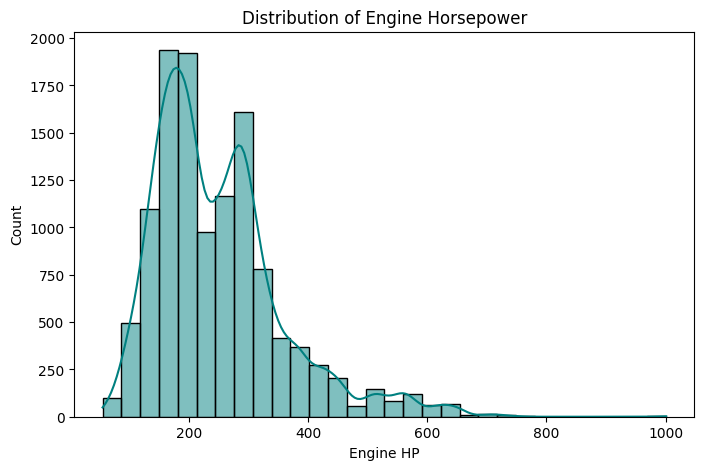

In [10]:

# --- Visualization 1: Engine HP distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df['Engine HP'], bins=30, kde=True, color='teal')
plt.title('Distribution of Engine Horsepower')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()


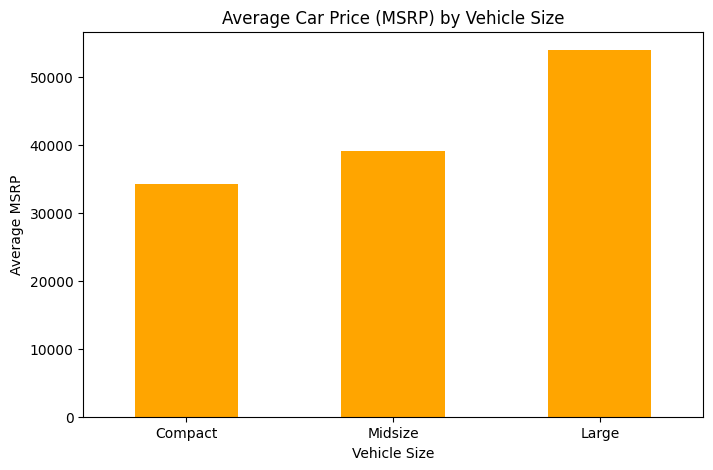

In [11]:
# --- Visualization 2: Vehicle Size vs Average MSRP ---
plt.figure(figsize=(8,5))
df.groupby('Vehicle Size')['MSRP'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Average Car Price (MSRP) by Vehicle Size')
plt.xlabel('Vehicle Size')
plt.ylabel('Average MSRP')
plt.xticks(rotation=0)
plt.show()

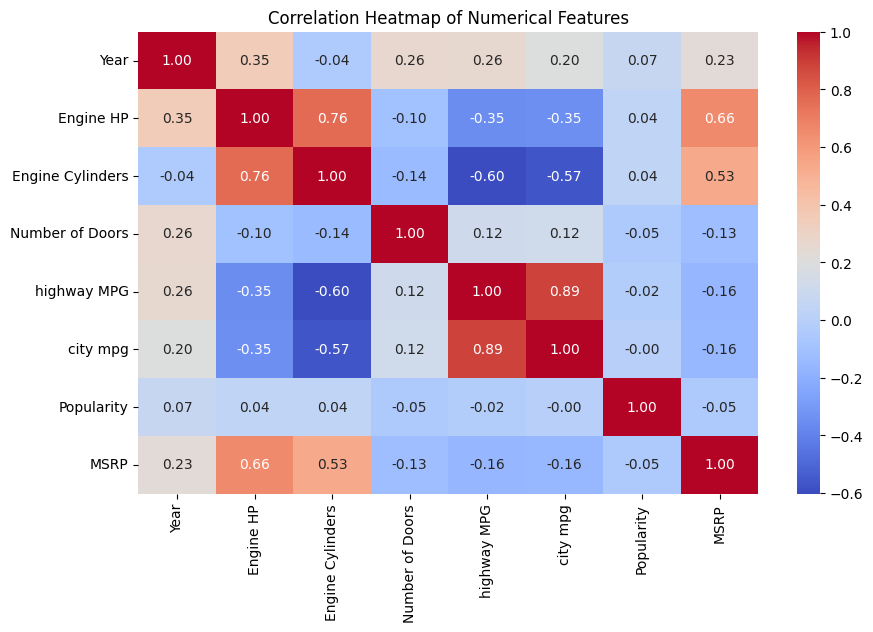

In [12]:

# --- Visualization 3: Correlation heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

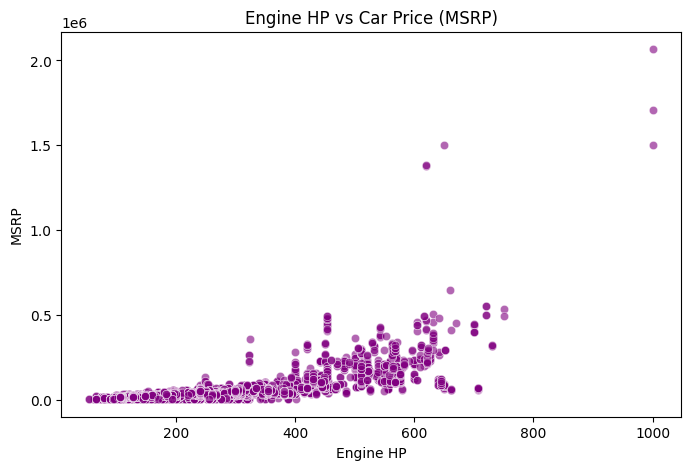

In [13]:

# --- Visualization 4: Relationship between Engine HP and MSRP ---
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine HP', y='MSRP', data=df, alpha=0.6, color='purple')
plt.title('Engine HP vs Car Price (MSRP)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

/tmp/ipykernel_70725/4193034175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Counts", y = "Make", data = top_10_df, palette="coolwarm")


Text(0.5, 1.0, 'Top 10 Car Brand')

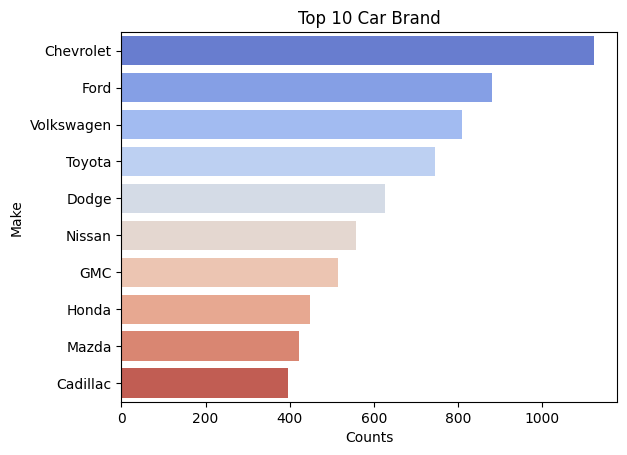

In [14]:
top_brand = df["Make"].value_counts().head(10)
top_10_df = top_brand.reset_index()
top_10_df.columns = ["Make", "Counts"]

sns.barplot(x = "Counts", y = "Make", data = top_10_df, palette="coolwarm")
plt.title("Top 10 Car Brand")

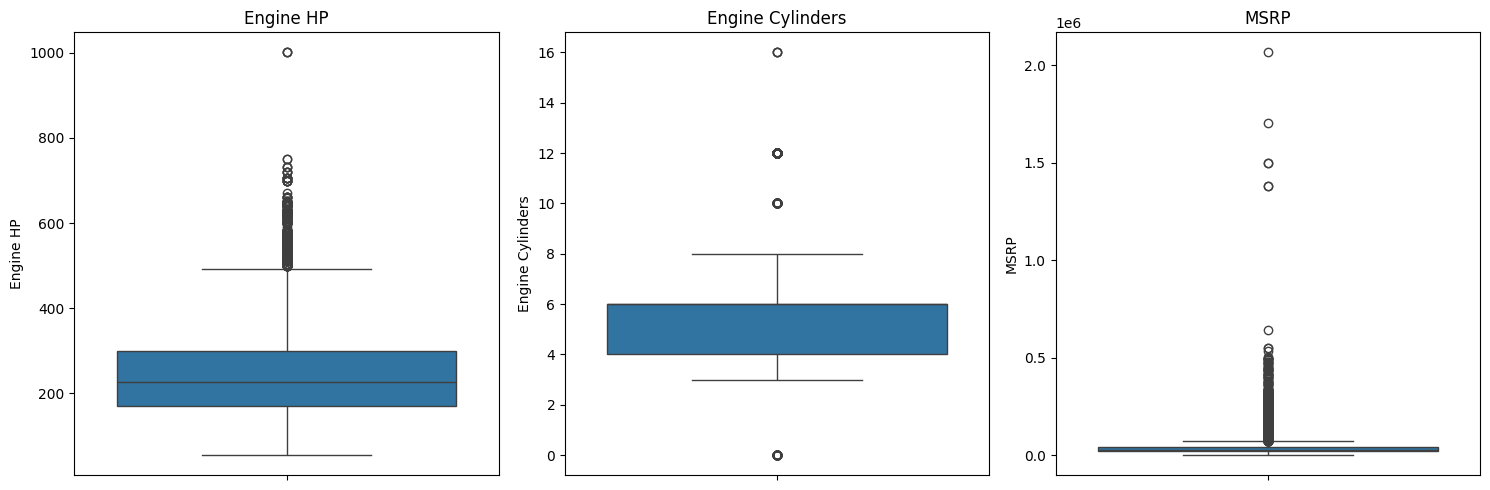

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df["Engine HP"], ax=axes[0])
axes[0].set_title("Engine HP")

sns.boxplot(y=df["Engine Cylinders"], ax=axes[1])
axes[1].set_title("Engine Cylinders")

sns.boxplot(y=df["MSRP"], ax=axes[2])
axes[2].set_title("MSRP")

plt.tight_layout()
plt.show()

In [15]:
df.select_dtypes(include='object').columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [16]:
categorical_cols = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    if col != 'Model':  # skip model column
        df[col] = le.fit_transform(df[col])


# Encode the Model Column
freq_encoding = df['Model'].value_counts().to_dict()
df['Model'] = df['Model'].map(freq_encoding)


## All Column convert into Numerical

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [19]:
df_scaled

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,-1.321914,-0.984775,0.081228,0.004014,0.786382,0.208729,1.675670,1.152896,-1.629968,-0.330719,-1.105198,-0.072270,-0.071930,-0.081587,1.637604,0.092174
1,-1.321914,-0.463276,0.081228,0.004014,0.464900,0.208729,1.675670,1.152896,-1.629968,0.913703,-1.105198,-0.479182,0.153737,-0.081587,1.637604,0.000919
2,-1.321914,-0.463276,0.081228,0.004014,0.464900,0.208729,1.675670,1.152896,-1.629968,0.784969,-1.105198,-0.072270,0.153737,0.029680,1.637604,-0.070620
3,-1.321914,-0.463276,0.081228,0.004014,-0.178065,0.208729,1.675670,1.152896,-1.629968,0.913703,-1.105198,-0.072270,0.153737,-0.192853,1.637604,-0.185416
4,-1.321914,-0.463276,0.081228,0.004014,-0.178065,0.208729,1.675670,1.152896,-1.629968,0.742058,-1.105198,-0.479182,0.153737,-0.192853,1.637604,-0.101399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-1.596919,-0.776175,0.213164,0.004014,0.464900,0.208729,-0.487387,-1.659471,0.640035,-1.403495,1.180202,-1.293007,-0.410430,-0.415387,-0.936965,0.091924
11910,-1.596919,-0.776175,0.213164,0.004014,0.464900,0.208729,-0.487387,-1.659471,0.640035,-1.403495,1.180202,-1.293007,-0.410430,-0.415387,-0.936965,0.267446
11911,-1.596919,-0.776175,0.213164,0.004014,0.464900,0.208729,-0.487387,-1.659471,0.640035,-1.403495,1.180202,-1.293007,-0.410430,-0.415387,-0.936965,0.166791
11912,-1.596919,-0.776175,0.345101,-0.552132,0.464900,0.208729,-0.487387,-1.659471,0.640035,-1.403495,1.180202,-1.293007,-0.410430,-0.415387,-0.936965,0.171783


## Now this Data is ready to go into model for prediction